July 2nd, 2025
Filter the extra contigs from pairs file

In [2]:
import sys
import gzip
import matplotlib.pyplot as plt
import numpy as np
import cooler
import pandas as pd
import cooltools

Keep only the assembled chromosomes and disregard the extra contigs

In [3]:
def filter_pairs_by_specific_chromosomes(input_file, output_file):
    # List of chromosomes to filter
    target_chromosomes = ["2L_JJg14_439","2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439", "4_JJg14_439", "X_JJg14_439", "Y_JJg14_439", "2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057", "4_JJg14_057", "X_JJg14_057", "Y_JJg14_057"]
    buffer = []
    
    buffer_size = 10000

    with gzip.open(input_file, 'rt') as infile, gzip.open(output_file, 'wt') as outfile:
        for line in infile:
            if line.startswith("#"):  # Process header lines
                # Check if the header line starts with any of the target chromosomes
                if line.startswith("#chromsize"):
                    parts = line.strip().split(" ")
                    if parts[1] in target_chromosomes:
                        buffer.append(line)

                elif line.startswith("#samheader: @SQ"):
                    parts = line.strip().split(":")
                    parts2 = parts[2].strip().split("LN")
                    if parts2[0].strip() in target_chromosomes:
                        buffer.append(line)
                else:
                    buffer.append(line)

                outfile.writelines(buffer)
                buffer=[]
                continue
            parts = line.strip().split("\t")
            # Check if both parts[1] and parts[3] are in the target chromosomes list
            if parts[1] in target_chromosomes and parts[3] in target_chromosomes:
                     
                buffer.append(line)
      
                if len(buffer) >= buffer_size:
                    outfile.writelines(buffer)
                    buffer=[]
        
        outfile.writelines(buffer)

        
        
input_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/24L004895_PnM1.pairs.gz"
input_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/24L004896_PnM2.pairs.gz"
input_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/24L004897_PnM3.pairs.gz"
output_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004895_PnM1.filt.pairs.gz"
output_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004896_PnM2.filt.pairs.gz"
output_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004897_PnM3.filt.pairs.gz"
  
filter_pairs_by_specific_chromosomes(input_file1, output_file1)
filter_pairs_by_specific_chromosomes(input_file2, output_file2)
filter_pairs_by_specific_chromosomes(input_file3, output_file3)


Pairs to coolers

(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes:20000 20250702_24L004895_PnM1.filt.pairs.gz 20250702_24L004895_PnM1.filt.cool



Filtering them even farther and keeping only the chromosomes with high coverage

In [4]:
def filter_pairs_by_specific_chromosomes(input_file, output_file):
    # List of chromosomes to filter
    target_chromosomes = ["2L_JJg14_439","2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439", "2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057"]
    buffer = []
    
    buffer_size = 10000

    with gzip.open(input_file, 'rt') as infile, gzip.open(output_file, 'wt') as outfile:
        for line in infile:
            if line.startswith("#"):  # Process header lines
                # Check if the header line starts with any of the target chromosomes
                if line.startswith("#chromsize"):
                    parts = line.strip().split(" ")
                    if parts[1] in target_chromosomes:
                        buffer.append(line)

                elif line.startswith("#samheader: @SQ"):
                    parts = line.strip().split(":")
                    parts2 = parts[2].strip().split("LN")
                    if parts2[0].strip() in target_chromosomes:
                        buffer.append(line)
                else:
                    buffer.append(line)

                outfile.writelines(buffer)
                buffer=[]
                continue
            parts = line.strip().split("\t")
            # Check if both parts[1] and parts[3] are in the target chromosomes list
            if parts[1] in target_chromosomes and parts[3] in target_chromosomes:
                     
                buffer.append(line)
      
                if len(buffer) >= buffer_size:
                    outfile.writelines(buffer)
                    buffer=[]
        
        outfile.writelines(buffer)

        
        

input_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004895_PnM1.filt.pairs.gz"
input_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004896_PnM2.filt.pairs.gz"
input_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004897_PnM3.filt.pairs.gz"
output_file1 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004895_PnM1.filtImportantChroms.pairs.gz"
output_file2 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004896_PnM2.filtImportantChroms.pairs.gz"
output_file3 = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_24L004897_PnM3.filtImportantChroms.pairs.gz"
  
filter_pairs_by_specific_chromosomes(input_file1, output_file1)
filter_pairs_by_specific_chromosomes(input_file2, output_file2)
filter_pairs_by_specific_chromosomes(input_file3, output_file3)

Pairs to cool
(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/diploid_genome.importantChroms.chromsizes:20000 20250708_24L004895_PnM1.filtImportantChroms.pairs.gz 20250708_24L004895_PnM1.filtImportantChroms.pairs.cool

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/diploid_genome.importantChroms.chromsizes:20000 20250708_24L004896_PnM2.filtImportantChroms.pairs.gz 20250708_24L004896_PnM2.filtImportantChroms.pairs.cool

cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/diploid_genome.importantChroms.chromsizes:20000 20250708_24L004897_PnM3.filtImportantChroms.pairs.gz 20250708_24L004897_PnM3.filtImportantChroms.pairs.cool

Merging into 1

cooler merge 20250708_PnMs_merged.ImportantChroms.cool 20250708_24L004895_PnM1.filtImportantChroms.pairs.cool 20250708_24L004896_PnM2.filtImportantChroms.pairs.cool 20250708_24L004897_PnM3.filtImportantChroms.pairs.cool

Balancing the cooler

cooler balance --mad-max 5 --ignore-diags 2 --max-iters 10000 20250708_PnMs_merged.ImportantChroms.cool

Extracting the weights

cooler dump --table bins --columns chrom,start,end,weight 20250708_PnMs_merged.ImportantChroms.cool --header >20250708_PnMs_merged.ImportantChroms.weights.txt

Plotting the weights

          chrom  start     end    weight
0  2L_JJg14_057      0   20000  0.022673
1  2L_JJg14_057  20000   40000  0.022470
2  2L_JJg14_057  40000   60000  0.014663
3  2L_JJg14_057  60000   80000  0.018202
4  2L_JJg14_057  80000  100000  0.014035


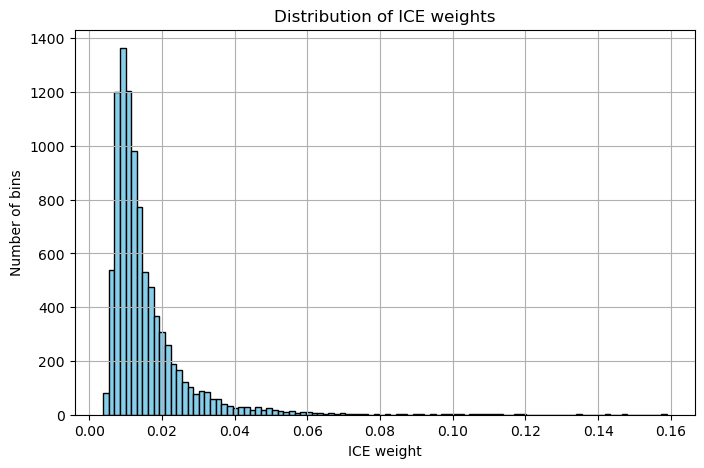

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load weights file (adjust path if needed)
df = pd.read_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.weights.txt", sep="\t")

# Check column names and data
print(df.head())

# The weight column might have missing entries; convert to numeric and drop NaNs
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
weights = df['weight'].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(weights, bins=100, color='skyblue', edgecolor='black')
plt.xlabel("ICE weight")
plt.ylabel("Number of bins")
plt.title("Distribution of ICE weights")
plt.grid(True)
plt.show()

Plotting the balanced vs unbalanced cooler

Matrix stats:
Max value: 20107
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


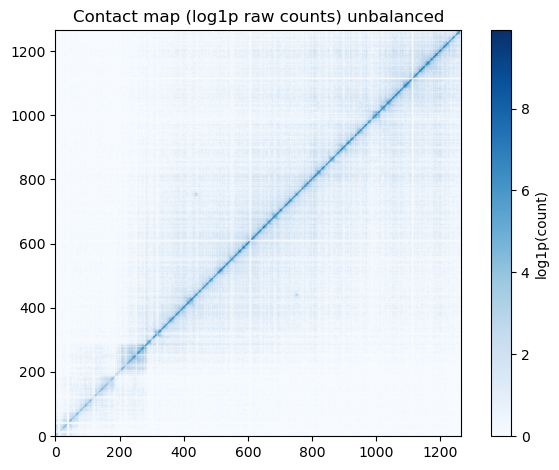

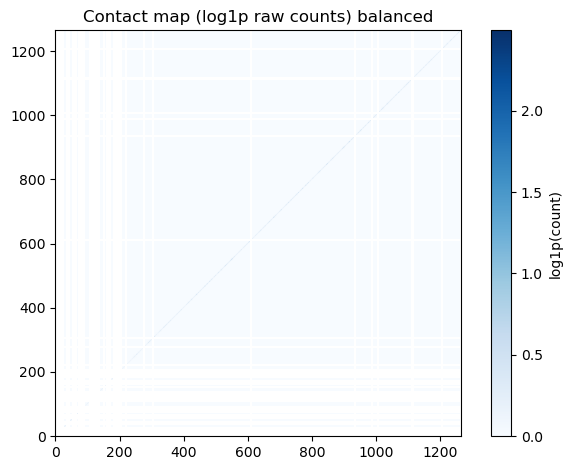

In [7]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.cool")


mat = clr.matrix(balance=False).fetch("2R_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2R_JJg14_057")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


Filtered coverage distribution


=== Per-chromosome coverage summary ===
              total_coverage  mean_coverage  median_coverage  min_coverage  \
chrom                                                                        
2L_JJg14_057      26438058.0   22481.341837          22127.5           2.0   
2R_JJg14_057      25536591.0   20187.028458          20111.0           4.0   
3L_JJg14_057      28779025.0   20468.723329          21073.0           0.0   
3R_JJg14_057      43100603.0   26870.700125          26883.5           0.0   
2L_JJg14_439      26487503.0   22523.386905          22247.5           6.0   
2R_JJg14_439      25644767.0   20272.543083          20319.0           7.0   
3L_JJg14_439      22935608.0   16312.665718          17082.0           0.0   
3R_JJg14_439      14367511.0    8957.301122           9394.5           0.0   

              max_coverage  low_coverage_bins  zero_coverage_bins  
chrom                                                              
2L_JJg14_057       62411.0                

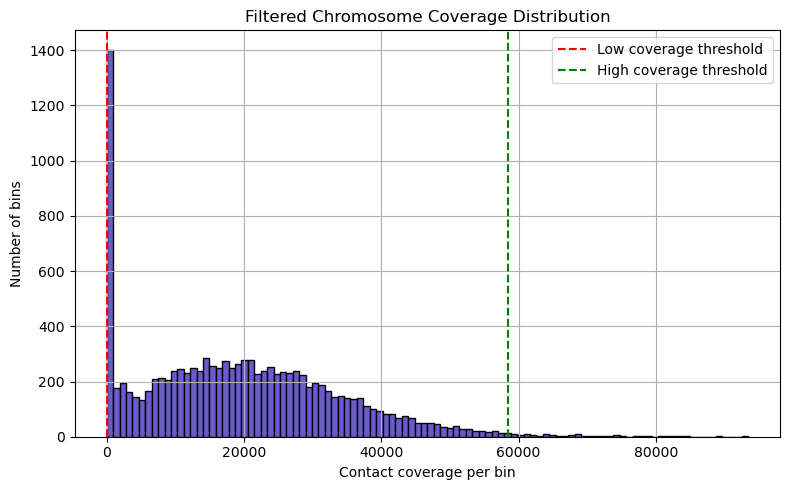

In [8]:
import cooler
import pandas as pd
import matplotlib.pyplot as plt

# Load your .cool file
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.cool"
clr = cooler.Cooler(cool_path)

# Load bins and pixel data
bins = clr.bins()[:].copy()
pixels = clr.pixels()[:]

# Filter to include only the target chromosomes
target_chromosomes = [
    "2L_JJg14_439", "2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439",
    "4_JJg14_439", "X_JJg14_439", "Y_JJg14_439",
    "2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057",
    "4_JJg14_057", "X_JJg14_057", "Y_JJg14_057"
]
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# Compute contact coverage per bin
bin1_counts = pixels.groupby("bin1_id")["count"].sum()
bin2_counts = pixels.groupby("bin2_id")["count"].sum()
coverage = bin1_counts.add(bin2_counts, fill_value=0)

# Merge coverage into bins
bins["coverage"] = coverage
bins["coverage"].fillna(0, inplace=True)

# Re-filter again to avoid stray pixels from unlisted chromosomes
bins = bins[bins["chrom"].isin(target_chromosomes)].copy()

# --------------------------
# ✅ Summary stats by chromosome
# --------------------------
summary = bins.groupby("chrom")["coverage"].agg(
    total_coverage="sum",
    mean_coverage="mean",
    median_coverage="median",
    min_coverage="min",
    max_coverage="max",
    low_coverage_bins=lambda x: (x < 10).sum(),
    zero_coverage_bins=lambda x: (x == 0).sum()
)

print("\n=== Per-chromosome coverage summary ===")
print(summary)

# --------------------------
# ✅ Define filtering thresholds
# --------------------------
low_cov_thresh = 10
high_cov_thresh = bins["coverage"].quantile(0.99)  # top 1%

# Flag bins
bins["low_coverage"] = bins["coverage"] < low_cov_thresh
bins["high_coverage"] = bins["coverage"] > high_cov_thresh

# Report
num_low = bins["low_coverage"].sum()
num_high = bins["high_coverage"].sum()

print(f"\nNumber of low coverage bins (< {low_cov_thresh} contacts): {num_low}")
print(f"Number of high coverage bins (> 99th percentile ~ {high_cov_thresh:.2f}): {num_high}")

# --------------------------
# ✅ Plot histogram of coverage
# --------------------------
plt.figure(figsize=(8, 5))
plt.hist(bins["coverage"], bins=100, color="slateblue", edgecolor="black")
plt.axvline(low_cov_thresh, color="red", linestyle="--", label="Low coverage threshold")
plt.axvline(high_cov_thresh, color="green", linestyle="--", label="High coverage threshold")
plt.xlabel("Contact coverage per bin")
plt.ylabel("Number of bins")
plt.title("Filtered Chromosome Coverage Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Coverage per chromosme

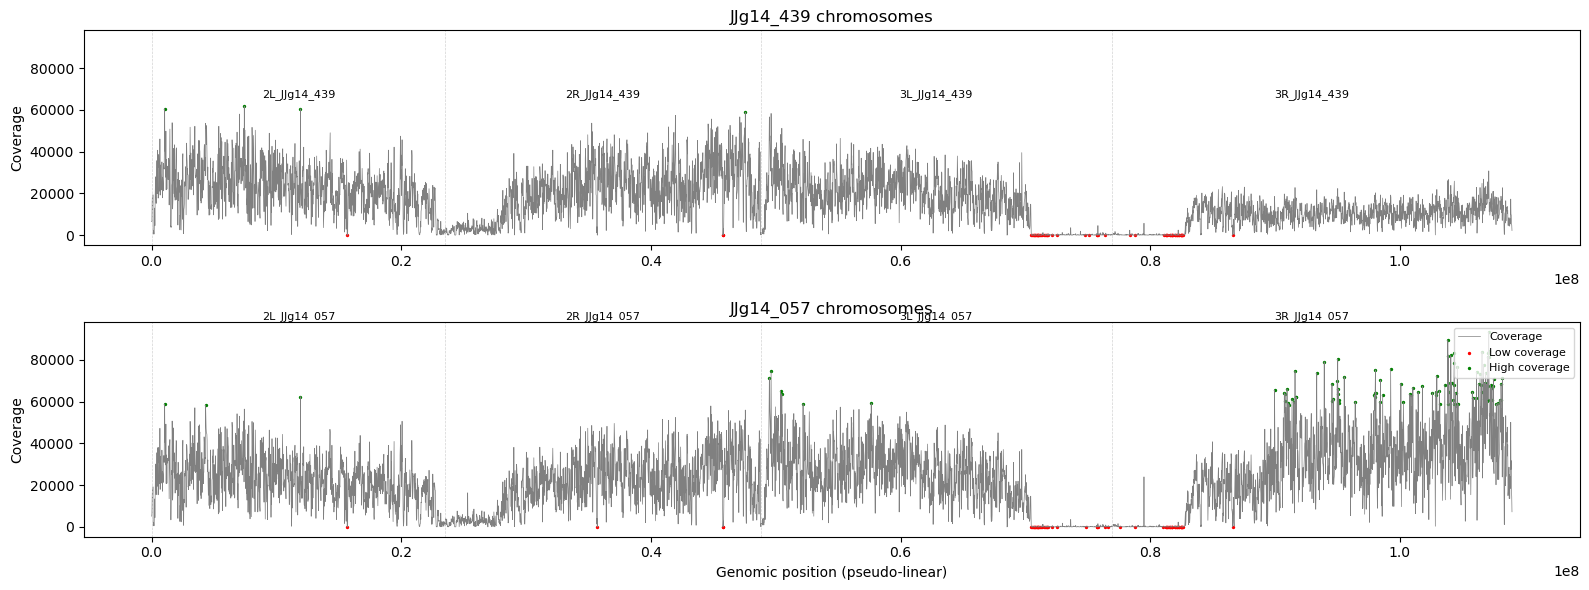

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your chromosome groups
track1_chroms = ["2L_JJg14_439", "2R_JJg14_439", "3L_JJg14_439", "3R_JJg14_439"]
track2_chroms = ["2L_JJg14_057", "2R_JJg14_057", "3L_JJg14_057", "3R_JJg14_057"]

# Assume `bins` is already loaded with required columns
bins["bin_length"] = bins["end"] - bins["start"]

def assign_genomic_positions(df, chrom_order):
    chrom_offsets = {}
    offset = 0
    for chrom in chrom_order:
        chrom_len = df[df["chrom"] == chrom]["bin_length"].sum()
        chrom_offsets[chrom] = offset
        offset += chrom_len
    df = df[df["chrom"].isin(chrom_order)].copy()
    df["genomic_pos"] = df.apply(lambda row: row["start"] + chrom_offsets[row["chrom"]], axis=1)
    return df, chrom_offsets

# Create subsets
track1_bins, track1_offsets = assign_genomic_positions(bins, track1_chroms)
track2_bins, track2_offsets = assign_genomic_positions(bins, track2_chroms)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharey=True, sharex=False)

def plot_track(ax, data, chrom_offsets, title):
    ax.plot(data["genomic_pos"], data["coverage"], color="gray", lw=0.5, label="Coverage")
    ax.scatter(data.loc[data["low_coverage"], "genomic_pos"], data.loc[data["low_coverage"], "coverage"],
               color="red", s=2, label="Low coverage")
    ax.scatter(data.loc[data["high_coverage"], "genomic_pos"], data.loc[data["high_coverage"], "coverage"],
               color="green", s=2, label="High coverage")

    for chrom in chrom_offsets:
        ax.axvline(chrom_offsets[chrom], color="lightgray", linestyle="--", lw=0.5)
        mid = chrom_offsets[chrom] + data[data["chrom"] == chrom]["bin_length"].sum() / 2
        ax.text(mid, data["coverage"].max() * 1.05, chrom, ha="center", va="bottom", fontsize=8)

    ax.set_title(title)
    ax.set_ylabel("Coverage")

plot_track(ax1, track1_bins, track1_offsets, "JJg14_439 chromosomes")
plot_track(ax2, track2_bins, track2_offsets, "JJg14_057 chromosomes")

ax2.set_xlabel("Genomic position (pseudo-linear)")
ax2.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()

P(s) curves

INFO:root:creating a Pool of 2 workers
/tmp/ipykernel_471924/4200982660.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


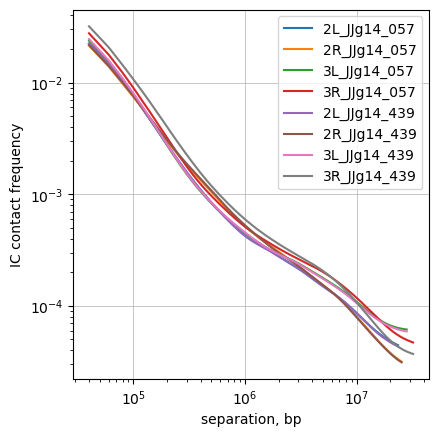

In [11]:
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/diploid_genome.importantChroms.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')

Blacklisting the regions with super high or super low coverage

In [12]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.cool")
bins = clr.bins()[:]

# Calculate coverage
pixels = clr.pixels()[:]
coverage = pixels.groupby("bin1_id")["count"].sum().reindex(bins.index).fillna(0)
bins["coverage"] = coverage

# Mask low and high coverage bins
mask = (bins["coverage"] > bins["coverage"].quantile(0.05)) & \
       (bins["coverage"] < bins["coverage"].quantile(0.95))

# Save binary mask (1=keep, 0=blacklist)
mask.astype(int).to_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.binmask.txt", index=False, header=False)

#Balancing again with blacklisting these regions

 mv 20250708_PnMs_merged.ImportantChroms.cool.bk 20250708_PnMs_merged.ImportantChroms.blacklistReg.cool

 I'm having issues blacklisting using: 
 cooler balance --name weight --force --blacklist 20250708_PnMs_merged.ImportantChroms.binmask.txt 20250708_PnMs_merged.ImportantChroms.blacklistReg.cool

 Doing it in python

In [16]:
import numpy as np
import pandas as pd
import cooler
from cooler.balance import iterative_correction

# Load cooler
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.cool")

# Step 1: Get bins and pixels
bins_df = clr.bins()[:]
pixels_df = clr.pixels()[:]

# Step 2: Compute coverage and mask
coverage = pixels_df.groupby("bin1_id")["count"].sum().reindex(bins_df.index).fillna(0)
mask = (coverage > np.percentile(coverage, 5)) & (coverage < np.percentile(coverage, 95))  # Keep bins within 5%-95% coverage

# Ensure mask is a boolean array
mask = mask.values

# Step 3: Run ICE normalization
weights, stats = iterative_correction(
    clr.matrix(balance=False)[:],
    mask=mask,
    ignore_diags=2,
    max_iters=1000,
    tol=1e-5
)

# Step 4: Add weights to bins
bins_df = bins_df[['chrom', 'start', 'end']].copy()
bins_df['weight'] = weights

# Step 5: Re-save cooler file
cooler.create_cooler(
    outfile="/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.ImportantChroms.balanced.masked.cool",
    bins=bins_df,
    pixels=pixels_df,
    assembly=clr.info.get("genome-assembly", None),
    metadata=clr.info
)

TypeError: balance_cooler() got an unexpected keyword argument 'mask'